In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#dtype warning for columns (12,18,24,25,26,27,29,47,60)
dtype_columns = {"Level":float, "CS in Team's Jungle":float, "Vision Score":float, "Wards placed":float, "Wards destroyed":float, "Control Wards Purchased":float, "VSPM":float, "GD@15":float, "Total damage taken":float}

In [8]:
# stops pandas from interpreting NA (the region) as missing value NaN
df = pd.read_csv("combined_match_stats.csv", keep_default_na=False,na_values=[""],low_memory=False)

In [9]:
df.head()

,GameID,Team,Result,Game Time,Side,Patch,Tournament,Date,Region,Champion,...,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ksante,...,NaN,NaN,NaN,NaN,26434.7,NaN,NaN,NaN,NaN,NaN
1,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Viego,...,NaN,NaN,NaN,NaN,42723.7,NaN,NaN,NaN,NaN,NaN
2,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Aurora,...,NaN,NaN,NaN,NaN,16880.7,NaN,NaN,NaN,NaN,NaN
3,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ashe,...,NaN,NaN,NaN,NaN,15290.8,NaN,NaN,NaN,NaN,NaN
4,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Braum,...,NaN,NaN,NaN,NaN,17962.1,NaN,NaN,NaN,NaN,NaN


In [10]:
print(df.columns.tolist())

['GameID', 'Team', 'Result', 'Game Time', 'Side', 'Patch', 'Tournament', 'Date', 'Region', 'Champion', 'Player', 'Role', 'Level', 'Kills', 'Deaths', 'Assists', 'KDA', 'CS', "CS in Team's Jungle", 'CS in Enemy Jungle', 'CSM', 'Golds', 'GPM', 'GOLD%', 'Vision Score', 'Wards placed', 'Wards destroyed', 'Control Wards Purchased', 'Detector Wards Placed', 'VSPM', 'WPM', 'VWPM', 'WCPM', 'VS%', 'Total damage to Champion', 'Physical Damage', 'Magic Damage', 'True Damage', 'DPM', 'DMG%', 'K+A Per Minute', 'KP%', 'Solo kills', 'Double kills', 'Triple kills', 'Quadra kills', 'Penta kills', 'GD@15', 'CSD@15', 'XPD@15', 'LVLD@15', 'Objectives Stolen', 'Damage dealt to turrets', 'Damage dealt to buildings', 'Total heal', 'Total Heals On Teammates', 'Damage self mitigated', 'Total Damage Shielded On Teammates', 'Time ccing others', 'Total Time CC Dealt', 'Total damage taken', 'Total Time Spent Dead', 'Consumables purchased', 'Items Purchased', 'Shutdown bounty collected', 'Shutdown bounty lost']


In [11]:
print(df.columns[[12, 18, 24, 25, 26, 27, 29, 47, 60]])

Index(['Level', 'CS in Team's Jungle', 'Vision Score', 'Wards placed',
       'Wards destroyed', 'Control Wards Purchased', 'VSPM', 'GD@15',
       'Total damage taken'],
      dtype='object')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23470 entries, 0 to 23469
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GameID                              23470 non-null  int64  
 1   Team                                23470 non-null  object 
 2   Result                              23470 non-null  object 
 3   Game Time                           23470 non-null  object 
 4   Side                                23470 non-null  object 
 5   Patch                               23470 non-null  object 
 6   Tournament                          23470 non-null  object 
 7   Date                                23470 non-null  object 
 8   Region                              23470 non-null  object 
 9   Champion                            23470 non-null  object 
 10  Player                              23470 non-null  object 
 11  Role                                23470

In [13]:
df = df[df["GameID"] != 63197]

In [14]:
df.isnull().sum()

GameID                          0
Team                            0
Result                          0
Game Time                       0
Side                            0
                             ... 
Total Time Spent Dead        8170
Consumables purchased        8170
Items Purchased              8170
Shutdown bounty collected    8170
Shutdown bounty lost         8170
Length: 66, dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23469
Data columns (total 66 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   GameID                              23460 non-null  int64  
 1   Team                                23460 non-null  object 
 2   Result                              23460 non-null  object 
 3   Game Time                           23460 non-null  object 
 4   Side                                23460 non-null  object 
 5   Patch                               23460 non-null  object 
 6   Tournament                          23460 non-null  object 
 7   Date                                23460 non-null  object 
 8   Region                              23460 non-null  object 
 9   Champion                            23460 non-null  object 
 10  Player                              23460 non-null  object 
 11  Role                                23460 non-

In [16]:
df = df.dropna(axis=1)

In [17]:
df.head()

,GameID,Team,Result,Game Time,Side,Patch,Tournament,Date,Region,Champion,...,Total damage to Champion,Physical Damage,Magic Damage,True Damage,DPM,DMG%,K+A Per Minute,KP%,GD@15,Total damage taken
0,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ksante,...,9830.40,7914.28,1012.28,903.84,278,12.4%,0.20,41.2%,-600.0,26434.7
1,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Viego,...,10013.26,8758.59,1070.67,184.00,283,12.6%,0.25,52.9%,528.0,42723.7
2,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Aurora,...,37571.06,1077.96,35183.30,1309.80,1062,47.4%,0.37,76.5%,1072.0,16880.7
3,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Ashe,...,15603.29,14094.30,1508.99,0.00,441,19.7%,0.25,52.9%,-199.0,15290.8
4,62896,Weibo Gaming,WIN,35:23,Blue,v15.1,LPL 2025 Split 1,2025-01-12,CN,Braum,...,6292.02,465.85,5826.17,0.00,178,7.9%,0.34,70.6%,250.0,17962.1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23469
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   GameID                    23460 non-null  int64  
 1   Team                      23460 non-null  object 
 2   Result                    23460 non-null  object 
 3   Game Time                 23460 non-null  object 
 4   Side                      23460 non-null  object 
 5   Patch                     23460 non-null  object 
 6   Tournament                23460 non-null  object 
 7   Date                      23460 non-null  object 
 8   Region                    23460 non-null  object 
 9   Champion                  23460 non-null  object 
 10  Player                    23460 non-null  object 
 11  Role                      23460 non-null  object 
 12  Level                     23460 non-null  float64
 13  Kills                     23460 non-null  int64  
 14  Deaths     

In [19]:
df = df.drop(["KDA","CS in Team's Jungle", "CSM", "Physical Damage", "Magic Damage", "True Damage", "Total damage taken", "Total damage to Champion", "CS", "Vision Score", "Wards placed", "Wards destroyed", "Control Wards Purchased", "VSPM", "WPM", "WCPM", "VWPM" ], axis = 1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23460 entries, 0 to 23469
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GameID          23460 non-null  int64  
 1   Team            23460 non-null  object 
 2   Result          23460 non-null  object 
 3   Game Time       23460 non-null  object 
 4   Side            23460 non-null  object 
 5   Patch           23460 non-null  object 
 6   Tournament      23460 non-null  object 
 7   Date            23460 non-null  object 
 8   Region          23460 non-null  object 
 9   Champion        23460 non-null  object 
 10  Player          23460 non-null  object 
 11  Role            23460 non-null  object 
 12  Level           23460 non-null  float64
 13  Kills           23460 non-null  int64  
 14  Deaths          23460 non-null  int64  
 15  Assists         23460 non-null  int64  
 16  Golds           23460 non-null  int64  
 17  GPM             23460 non-null  int6

In [21]:
df["Result"] = df["Result"].map({"WIN": 1, "LOSS": 0})

In [22]:
df["Champion"] = df["Champion"].str.replace(r"\bRek\b", "Reksai", regex=True)
df["Champion"] = df["Champion"].str.replace(r"\bKha\b", "Khazix", regex=True)

In [23]:
df["Patch"] = df["Patch"].str.lstrip("v")

In [24]:
df["Side"] = df["Side"].map({"Blue": 1, "Red":  0})

In [25]:
df["Game Time"] = pd.to_timedelta("00:" + df["Game Time"])
df["Game Time"] = pd.to_timedelta(df["Game Time"]).dt.total_seconds()

In [26]:
df["KP%"] = (df["KP%"].str.rstrip("%").astype(float)/100).round(3)
df["GOLD%"] = (df["GOLD%"].str.rstrip("%").astype(float)/100).round(3)
df["VS%"] = (df["VS%"].str.rstrip("%").astype(float)/100).round(3)
df["DMG%"] = (df["DMG%"].str.rstrip("%").astype(float)/100).round(3)

In [27]:
numerical_cols = df.select_dtypes(include=["number"]).columns
correlation_matrix = df[numerical_cols].corr()

In [28]:
pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)
correlation_matrix

,GameID,Result,Game Time,Side,Level,Kills,Deaths,Assists,Golds,GPM,GOLD%,VS%,DPM,DMG%,K+A Per Minute,KP%,GD@15
GameID,1.000000e+00,-2.868984e-15,-1.460681e-02,-3.419860e-16,0.024528,0.015926,0.022018,0.046928,0.007941,0.020527,-0.000027,-0.000025,0.025388,0.000017,0.052789,0.036858,1.690039e-17
Result,-2.868984e-15,1.000000e+00,2.574202e-17,5.711850e-02,0.315428,0.391351,-0.544794,0.586429,0.311074,0.399742,-0.000025,0.000017,0.220886,0.000038,0.693623,0.114061,2.943573e-01
Game Time,-1.460681e-02,2.574202e-17,1.000000e+00,-3.155612e-17,0.488540,0.121740,0.169609,0.204665,0.571335,-0.008950,-0.000027,-0.000004,0.102788,0.000001,-0.046853,0.081772,-2.461808e-18
Side,-3.419860e-16,5.711850e-02,-3.155612e-17,1.000000e+00,0.017254,0.020391,-0.028179,0.029830,0.020811,0.028271,-0.000047,0.000031,0.023900,-0.000020,0.037613,0.008143,4.649365e-02
Level,2.452813e-02,3.154285e-01,4.885403e-01,1.725427e-02,1.000000,0.492519,-0.284862,0.092024,0.859442,0.721064,0.641905,-0.689468,0.611211,0.547795,0.186859,-0.050254,1.436386e-01
Kills,1.592572e-02,3.913513e-01,1.217396e-01,2.039052e-02,0.492519,1.000000,-0.274917,0.100944,0.687855,0.758694,0.598500,-0.366807,0.658409,0.500901,0.533567,0.202283,3.404444e-01
Deaths,2.201786e-02,-5.447940e-01,1.696092e-01,-2.817900e-02,-0.284862,-0.274917,1.000000,-0.174375,-0.249767,-0.436782,-0.246263,0.160532,-0.224085,-0.202441,-0.347049,-0.087057,-2.890705e-01
Assists,4.692820e-02,5.864294e-01,2.046653e-01,2.982951e-02,0.092024,0.100944,-0.174375,1.000000,0.086267,-0.016997,-0.343128,0.318883,-0.000252,-0.270393,0.838267,0.417966,1.832660e-01
Golds,7.940785e-03,3.110744e-01,5.713349e-01,2.081140e-02,0.859442,0.687855,-0.249767,0.086267,1.000000,0.805479,0.728838,-0.578592,0.696482,0.601777,0.248247,0.071022,2.147916e-01
GPM,2.052700e-02,3.997419e-01,-8.950266e-03,2.827147e-02,0.721064,0.758694,-0.436782,-0.016997,0.805479,1.000000,0.883462,-0.707190,0.773872,0.726631,0.363971,0.031084,2.852120e-01


array([[<Axes: title={'center': 'GameID'}>,
        <Axes: title={'center': 'Result'}>,
        <Axes: title={'center': 'Game Time'}>,
        <Axes: title={'center': 'Side'}>],
       [<Axes: title={'center': 'Level'}>,
        <Axes: title={'center': 'Kills'}>,
        <Axes: title={'center': 'Deaths'}>,
        <Axes: title={'center': 'Assists'}>],
       [<Axes: title={'center': 'Golds'}>,
        <Axes: title={'center': 'GPM'}>,
        <Axes: title={'center': 'GOLD%'}>,
        <Axes: title={'center': 'VS%'}>],
       [<Axes: title={'center': 'DPM'}>,
        <Axes: title={'center': 'DMG%'}>,
        <Axes: title={'center': 'K+A Per Minute'}>,
        <Axes: title={'center': 'KP%'}>],
       [<Axes: title={'center': 'GD@15'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

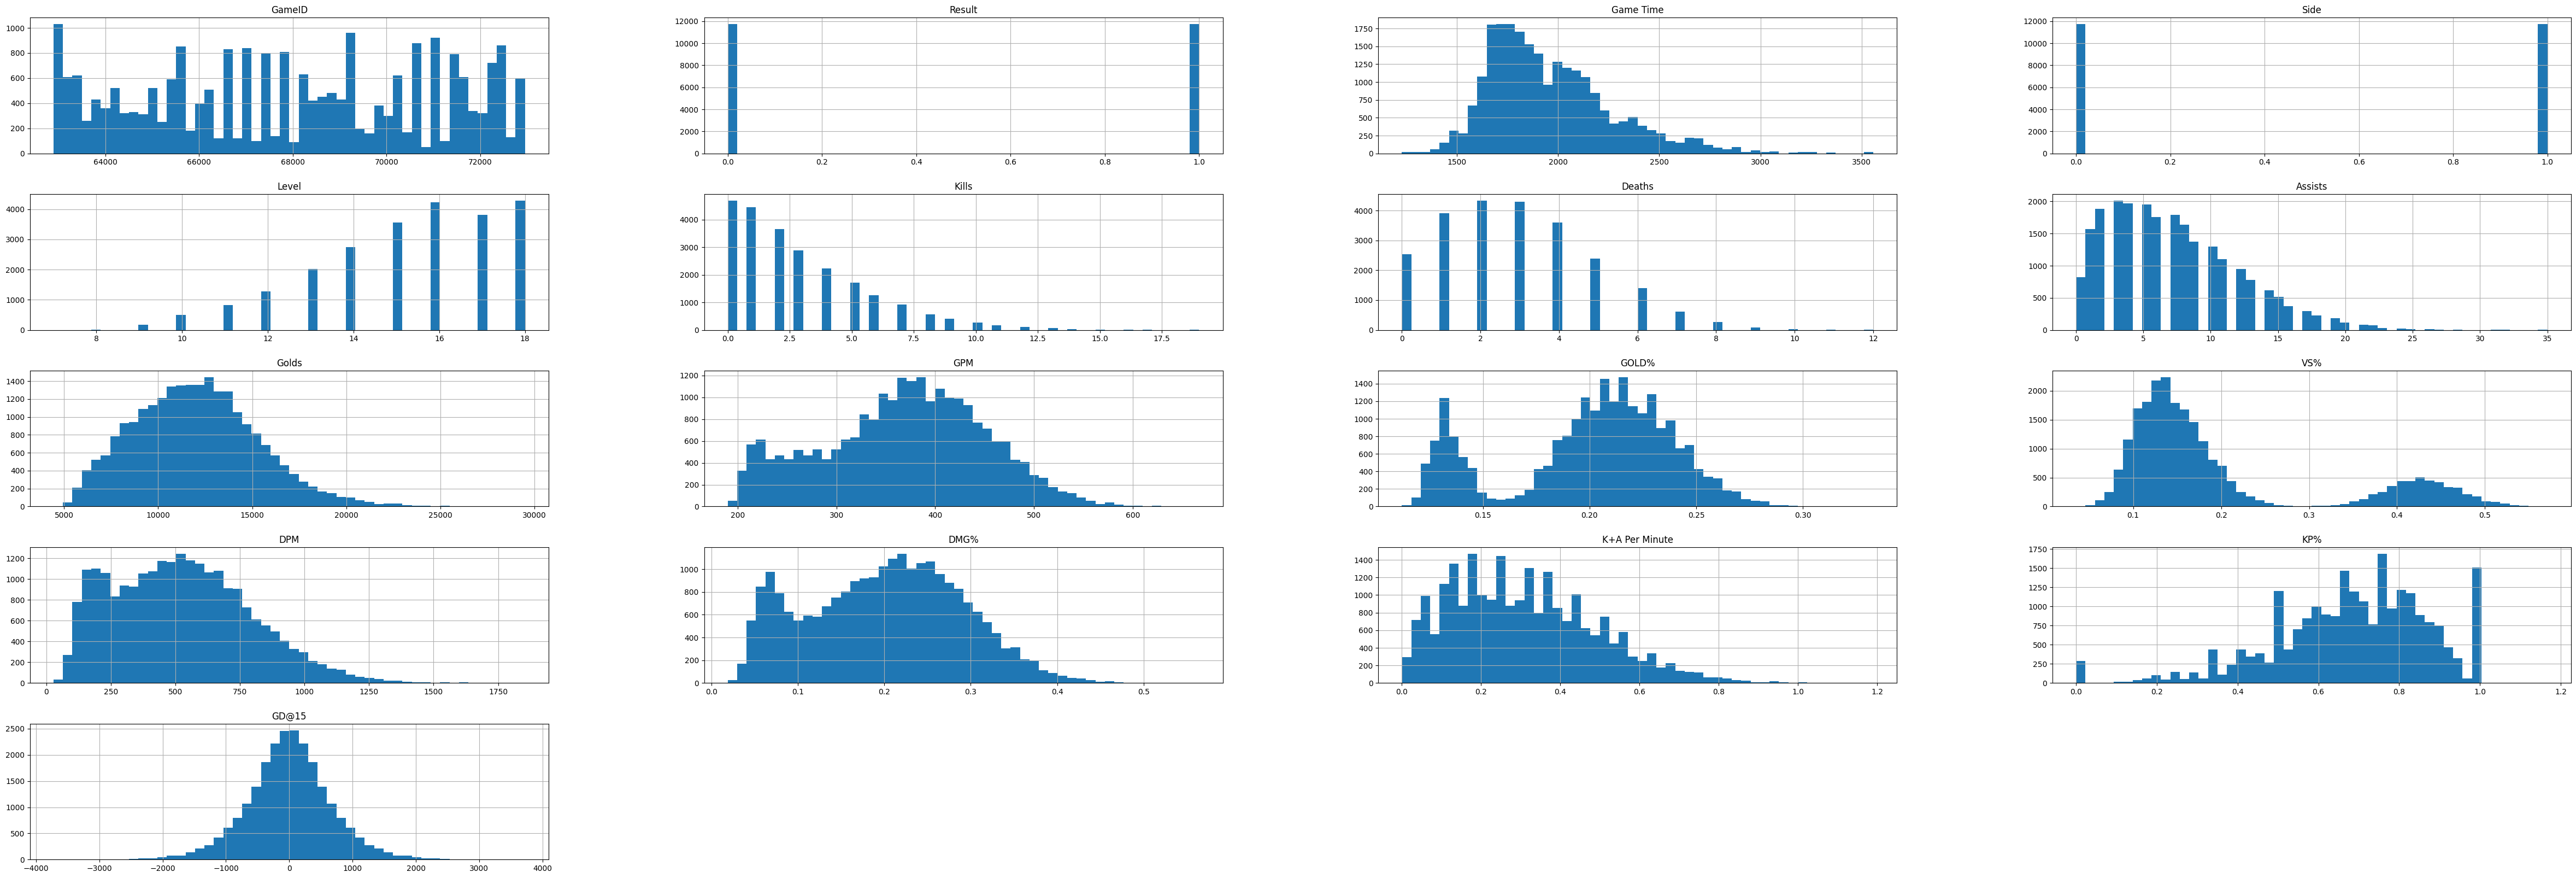

In [29]:
df.hist(bins=50, figsize=(60,20))

In [30]:
df

,GameID,Team,Result,Game Time,Side,Patch,Tournament,Date,Region,Champion,Player,Role,Level,Kills,Deaths,Assists,Golds,GPM,GOLD%,VS%,DPM,DMG%,K+A Per Minute,KP%,GD@15
0,62896,Weibo Gaming,1,2123.0,1,15.1,LPL 2025 Split 1,2025-01-12,CN,Ksante,Breathe,TOP,18.0,4,0,3,14706,416,0.212,0.096,278,0.124,0.20,0.412,-600.0
1,62896,Weibo Gaming,1,2123.0,1,15.1,LPL 2025 Split 1,2025-01-12,CN,Viego,Tian,JUNGLE,17.0,4,0,5,14586,412,0.210,0.165,283,0.126,0.25,0.529,528.0
2,62896,Weibo Gaming,1,2123.0,1,15.1,LPL 2025 Split 1,2025-01-12,CN,Aurora,xiaohu,MID,18.0,5,1,8,15720,444,0.226,0.130,1062,0.474,0.37,0.765,1072.0
3,62896,Weibo Gaming,1,2123.0,1,15.1,LPL 2025 Split 1,2025-01-12,CN,Ashe,Light,ADC,16.0,3,2,6,14688,415,0.211,0.173,441,0.197,0.25,0.529,-199.0
4,62896,Weibo Gaming,1,2123.0,1,15.1,LPL 2025 Split 1,2025-01-12,CN,Braum,Hang,SUPPORT,14.0,1,2,11,9762,276,0.141,0.436,178,0.079,0.34,0.706,250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23465,72955,Hanwha Life eSports,0,1923.0,0,15.20,Worlds 2025 Main Event,2025-10-28,WR,Camille,Zeus,TOP,16.0,3,5,1,12677,396,0.230,0.099,530,0.265,0.12,0.667,-1001.0
23466,72955,Hanwha Life eSports,0,1923.0,0,15.20,Worlds 2025 Main Event,2025-10-28,WR,Nocturne,Peanut,JUNGLE,14.0,0,4,5,9559,298,0.174,0.149,206,0.103,0.16,0.833,-339.0
23467,72955,Hanwha Life eSports,0,1923.0,0,15.20,Worlds 2025 Main Event,2025-10-28,WR,Aurora,Zeka,MID,16.0,1,3,3,11948,373,0.217,0.124,339,0.170,0.12,0.667,-243.0
23468,72955,Hanwha Life eSports,0,1923.0,0,15.20,Worlds 2025 Main Event,2025-10-28,WR,Smolder,Viper,ADC,17.0,2,2,3,13988,436,0.254,0.178,815,0.408,0.16,0.833,472.0


In [31]:
# fix team names for anyone's legend and psg talon has renamed themselves
df["Team"] = df["Team"].str.replace("anyone s legend", "Anyones Legend", case=False)
df['Team'] = df['Team'].str.replace('^talon$', 'PSG Talon', case=False, regex=True)

In [32]:
team_stats = df.groupby(["GameID", "Team"], as_index=False).agg({
    "Date": "first",
    "Region": "first",
    "Kills": "sum",
    "Deaths": "sum",
    "Assists": "sum",
    "Result": "first",
    "Game Time": "first",
    "Side": "first",
    "Patch": "first",
    "GD@15": "sum"
})

In [33]:
champions_per_role = df.groupby(["GameID", "Team", "Role"])["Champion"].first().unstack()
champions_per_role.columns = [f"{role}_champion" for role in champions_per_role.columns]

In [34]:
player_per_role = df.groupby(["GameID", "Team", "Role"])["Player"].first().unstack()
player_per_role.columns = [f"{role}_player" for role in player_per_role.columns]

In [35]:
kills_per_role = df.groupby(["GameID", "Team", "Role"])["Kills"].first().unstack()
kills_per_role.columns = [f"{role}_kills" for role in kills_per_role.columns]

In [36]:
assists_per_role = df.groupby(["GameID", "Team", "Role"])["Assists"].first().unstack()
assists_per_role.columns = [f"{role}_assists" for role in assists_per_role.columns]

In [37]:
deaths_per_role = df.groupby(["GameID", "Team", "Role"])["Deaths"].first().unstack()
deaths_per_role.columns = [f"{role}_deaths" for role in deaths_per_role.columns]

In [38]:
kp_per_role = df.groupby(["GameID", "Team", "Role"])["KP%"].first().unstack()
kp_per_role.columns = [f"{role}_kp%" for role in kp_per_role.columns]

In [39]:
dmg_per_role = df.groupby(["GameID", "Team", "Role"])["DMG%"].first().unstack()
dmg_per_role.columns = [f"{role}_dmg%" for role in dmg_per_role.columns]

In [40]:
ka_per_role = df.groupby(["GameID", "Team", "Role"])["K+A Per Minute"].first().unstack()
ka_per_role.columns = [f"{role}_ka_per_minute" for role in ka_per_role.columns]

In [41]:
gd_per_role = df.groupby(["GameID", "Team", "Role"])["GD@15"].first().unstack()
gd_per_role.columns = [f"{role}_gd@15" for role in gd_per_role.columns]

In [42]:
team_stats = (team_stats.merge(champions_per_role, on=["GameID", "Team"], how="left")
             .merge(player_per_role, on=["GameID", "Team"], how="left")
             .merge(kills_per_role, on=["GameID", "Team"], how="left")
             .merge(assists_per_role, on=["GameID", "Team"], how="left")
             .merge(deaths_per_role, on=["GameID", "Team"], how="left")
             .merge(kp_per_role, on=["GameID", "Team"], how="left")
             .merge(dmg_per_role, on=["GameID", "Team"], how="left")
             .merge(ka_per_role, on=["GameID", "Team"], how="left")
             .merge(gd_per_role, on=["GameID", "Team"], how="left")
             )


In [43]:
team_stats

,GameID,Team,Date,Region,Kills,Deaths,Assists,Result,Game Time,Side,Patch,GD@15,ADC_champion,JUNGLE_champion,MID_champion,SUPPORT_champion,TOP_champion,ADC_player,JUNGLE_player,MID_player,SUPPORT_player,TOP_player,ADC_kills,JUNGLE_kills,MID_kills,SUPPORT_kills,TOP_kills,ADC_assists,JUNGLE_assists,MID_assists,SUPPORT_assists,TOP_assists,ADC_deaths,JUNGLE_deaths,MID_deaths,SUPPORT_deaths,TOP_deaths,ADC_kp%,JUNGLE_kp%,MID_kp%,SUPPORT_kp%,TOP_kp%,ADC_dmg%,JUNGLE_dmg%,MID_dmg%,SUPPORT_dmg%,TOP_dmg%,ADC_ka_per_minute,JUNGLE_ka_per_minute,MID_ka_per_minute,SUPPORT_ka_per_minute,TOP_ka_per_minute,ADC_gd@15,JUNGLE_gd@15,MID_gd@15,SUPPORT_gd@15,TOP_gd@15
0,62896,OMG,2025-01-12,CN,5,17,9,0,2123.0,0,15.1,-1051.0,Varus,Nocturne,Orianna,Neeko,Gnar,Starry,Heng,Linfeng,Moham,Hery,2,2,0,0,1,2,1,3,3,0,4,4,3,4,2,0.800,0.600,0.600,0.600,0.200,0.213,0.146,0.231,0.147,0.262,0.11,0.08,0.08,0.08,0.03,199.0,-528.0,-1072.0,-250.0,600.0
1,62896,Weibo Gaming,2025-01-12,CN,17,5,33,1,2123.0,1,15.1,1051.0,Ashe,Viego,Aurora,Braum,Ksante,Light,Tian,xiaohu,Hang,Breathe,3,4,5,1,4,6,5,8,11,3,2,0,1,2,0,0.529,0.529,0.765,0.706,0.412,0.197,0.126,0.474,0.079,0.124,0.25,0.25,0.37,0.34,0.20,-199.0,528.0,1072.0,250.0,-600.0
2,62897,OMG,2025-01-12,CN,11,18,27,0,1952.0,1,15.1,-2888.0,Jhin,Maokai,Ambessa,Rell,Rumble,Starry,Heng,Linfeng,Moham,Hery,0,1,4,0,6,5,7,2,9,4,3,6,4,4,1,0.455,0.727,0.545,0.818,0.909,0.097,0.213,0.243,0.056,0.390,0.15,0.25,0.18,0.28,0.31,-1727.0,197.0,-922.0,-245.0,-191.0
3,62897,Weibo Gaming,2025-01-12,CN,18,11,40,1,1952.0,0,15.1,2888.0,Miss Fortune,Wukong,Viktor,Rakan,Jayce,Light,Tian,xiaohu,Hang,Breathe,4,6,1,2,5,9,6,7,11,7,1,2,3,2,3,0.722,0.667,0.444,0.722,0.667,0.316,0.157,0.306,0.044,0.178,0.40,0.37,0.25,0.40,0.37,1727.0,-197.0,922.0,245.0,191.0
4,62898,OMG,2025-01-12,CN,18,22,40,0,2014.0,1,15.1,2460.0,Ziggs,Zyra,Yone,Leona,Aatrox,Starry,Heng,Linfeng,Moham,Hery,5,6,6,0,1,9,9,4,13,5,3,6,6,3,4,0.778,0.833,0.556,0.722,0.333,0.314,0.285,0.166,0.091,0.144,0.42,0.45,0.30,0.39,0.18,672.0,936.0,178.0,1077.0,-403.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,72953,Hanwha Life eSports,2025-10-28,WR,22,29,44,0,3531.0,1,15.20,-123.0,Ziggs,Xin Zhao,Azir,Poppy,Ambessa,Viper,Peanut,Zeka,Delight,Zeus,8,4,2,4,4,8,8,8,11,9,1,7,5,8,8,0.727,0.545,0.455,0.682,0.591,0.409,0.135,0.182,0.048,0.225,0.27,0.20,0.17,0.25,0.22,421.0,474.0,-312.0,-165.0,-541.0
4688,72954,Gen.G eSports,2025-10-28,WR,6,22,14,0,1905.0,0,15.20,92.0,Kaisa,Skarner,Viktor,Bard,Sion,Ruler,Canyon,Chovy,Duro,Kiin,2,1,2,0,1,1,5,3,4,1,5,4,3,6,4,0.500,1.000,0.833,0.667,0.333,0.161,0.163,0.389,0.087,0.200,0.09,0.19,0.16,0.13,0.06,916.0,-146.0,-294.0,-152.0,-232.0
4689,72954,Hanwha Life eSports,2025-10-28,WR,22,6,60,1,1905.0,1,15.20,-92.0,Sivir,Trundle,Yone,Rakan,Rumble,Viper,Peanut,Zeka,Delight,Zeus,9,3,5,3,2,9,14,10,15,12,0,1,1,1,3,0.818,0.773,0.682,0.818,0.636,0.414,0.096,0.203,0.059,0.228,0.57,0.54,0.47,0.57,0.44,-916.0,146.0,294.0,152.0,232.0
4690,72955,Gen.G eSports,2025-10-28,WR,19,6,56,1,1923.0,1,15.20,798.0,Yunara,Nidalee,Hwei,Alistar,Ksante,Ruler,Canyon,Chovy,Duro,Kiin,7,3,4,1,4,6,13,13,14,10,2,1,1,0,2,0.684,0.842,0.895,0.789,0.737,0.188,0.177,0.325,0.039,0.271,0.41,0.50,0.53,0.47,0.44,-472.0,339.0,243.0,-313.0,1001.0


In [44]:
team_stats['Patch'] = team_stats['Patch'].astype(str)
team_stats.to_csv("combined_team_match_history.csv", index=False)